In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [34]:
def gaussian_kernel(kernel_size=3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

In [36]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

In [37]:
def wiener_filter_output(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = gaussian_kernel(3)
    filtered_img = wiener_filter(img, kernel, K = 30)
    fig = plt.figure(figsize=(12, 10))
    label = ['Original Image', 'Wiener Filter applied']
    fig.add_subplot(1, 2, 1)
    plt.imshow(img, cmap = 'gray')
    plt.title(label[0])
    fig.add_subplot(1, 2, 2)
    plt.imshow(filtered_img, cmap = 'gray')
    plt.title(label[1])
    plt.show()

In [38]:
path="/home/rafs/Desktop/Own Projects/ImageRecovery/data/test/sample/"

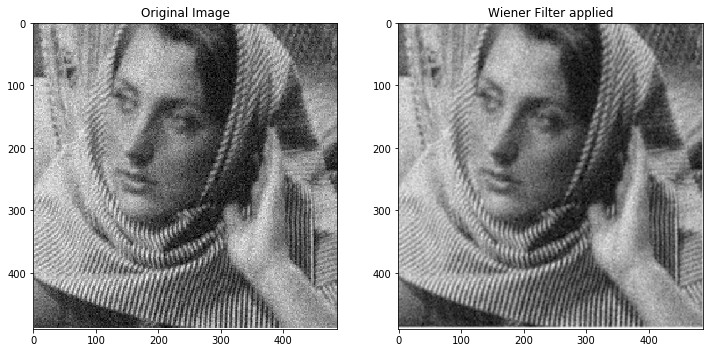

In [39]:
img=cv2.imread(path+"sample1.png")
wiener_filter_output(img)

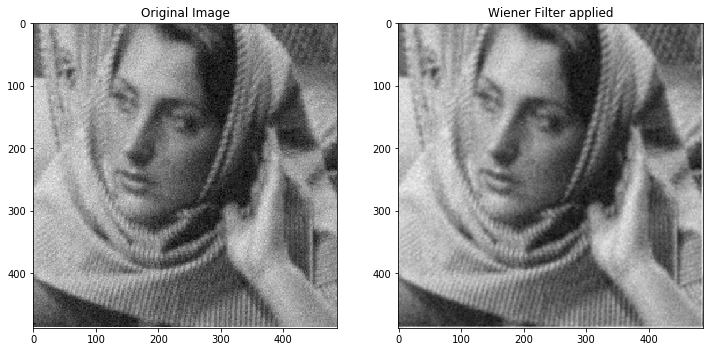

In [40]:
img=cv2.imread(path+"sample2.png")
wiener_filter_output(img)

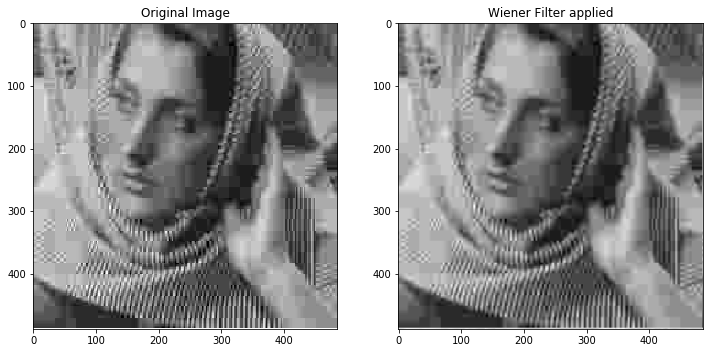

In [41]:
img=cv2.imread(path+"sample3.png")
wiener_filter_output(img)

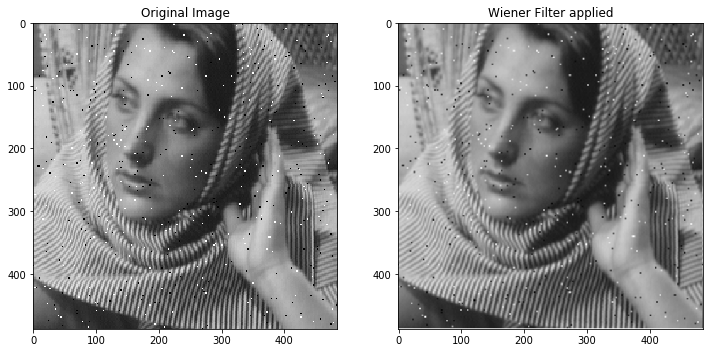

In [42]:
img=cv2.imread(path+"sample4.png")
wiener_filter_output(img)

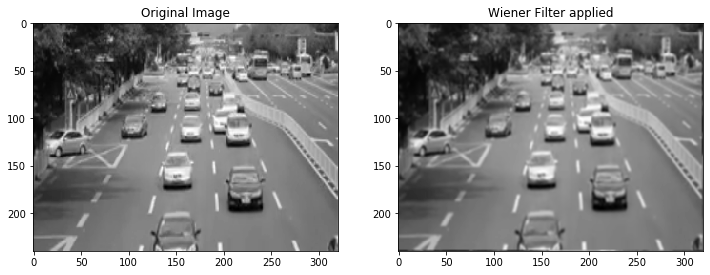

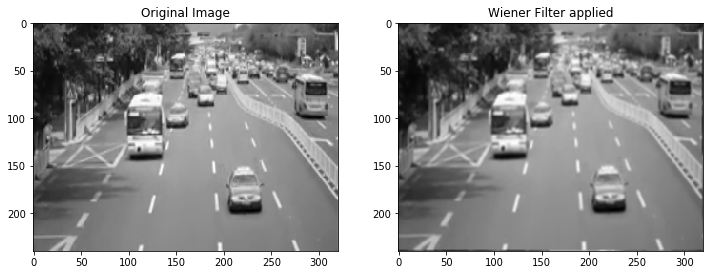

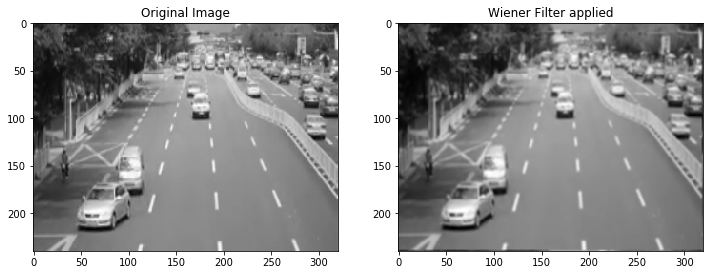

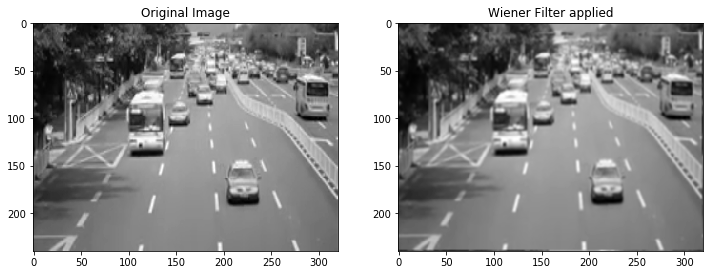

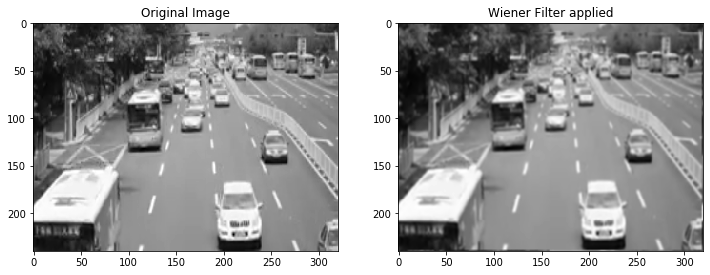

In [51]:
path="/home/rafs/Desktop/Own Projects/ImageRecovery/data/cctv/images/screenshot/"
idx=["s1.png", "s2.png", "s3.png", "s4.png", "s5.png", "s6.png"]
for i in range(1, len(idx)):
    img=cv2.imread(path+idx[i])
    img = cv2.resize(img, dsize=(320, 240), interpolation=cv2.INTER_CUBIC)
    wiener_filter_output(img)

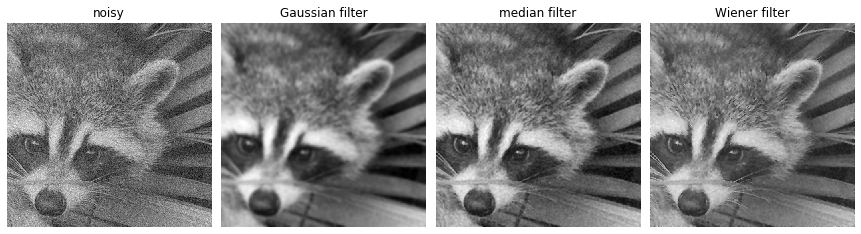

In [43]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:]  


from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt

import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

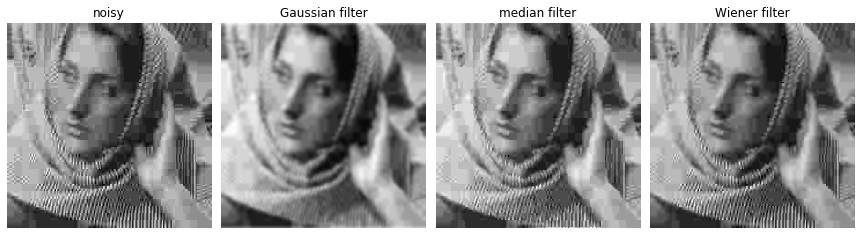

In [48]:
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt
img=cv2.imread(path+"sample3.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face=img
import numpy as np
noisy_face = np.copy(face).astype(np.float)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')


plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()